#**Books Recommendation System**

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')##importing the necessary libarary

##Books csv

In [99]:
book=pd.read_csv('Books.csv', encoding='latin1')##reading the books dataset
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [100]:
rating = pd.read_csv('Ratings.csv',encoding = 'latin1')##reading the rating dataset
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [101]:
user = pd.read_csv('Users.csv',encoding='latin1')##reading the user dataset

In [102]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [103]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [104]:
book_images_columns = book.drop(['Book-Title','Book-Author','Year-Of-Publication','Publisher'],axis=1)##Assigening the image url fo the each book to the other variables in case if we need it at the later case

In [105]:
book_images_columns

,ISBN,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...
271355,0440400988,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [106]:
book.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)##will the these column which is not required as of now in the model

In [107]:
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [108]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [109]:
book['Publisher'] = book['Publisher'].fillna("Unknown")##filling the missing values with the unknown value for the publisher

In [110]:
book['Book-Author'] = book['Book-Author'].fillna('Unknown')##illing the missing values with te unknown value for the book author

In [111]:
book.isnull().sum()##checking for any missing values

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [112]:
book.duplicated().sum()##checking for the duplicates

np.int64(0)

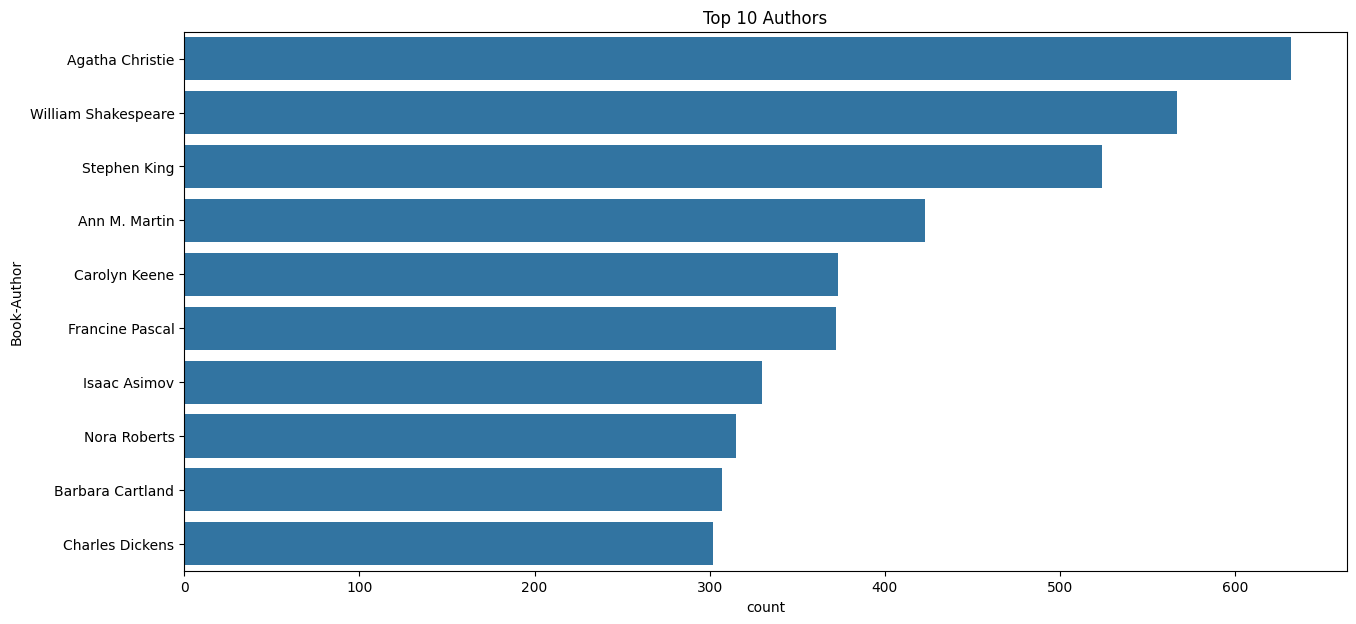

In [113]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=book,order=pd.value_counts(book['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')##Top 10 authors
plt.show()

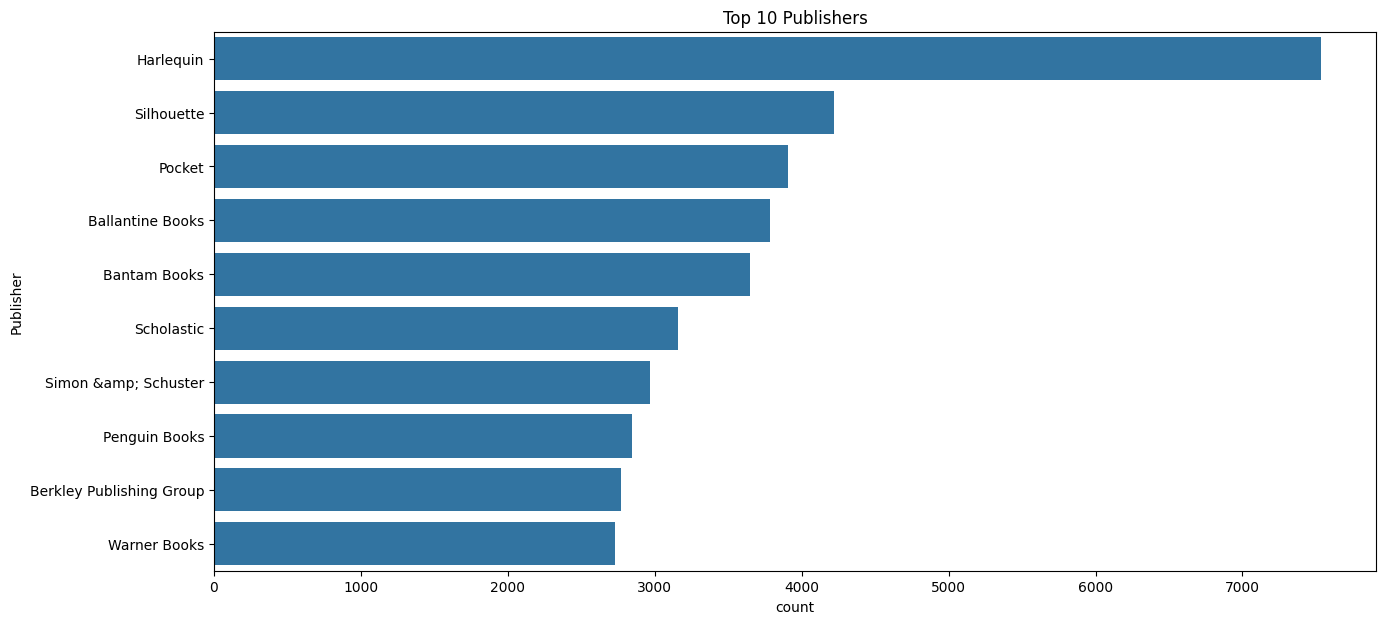

In [114]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=book,order=pd.value_counts(book['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')##geting the top 10 publishers
plt.show()

In [115]:
book['Year-Of-Publication'].value_counts()

Year-Of-Publication
2002    13903
2001    13715
1999    13414
2000    13373
1998    12116
        ...  
1897        1
2024        1
1376        1
1926        1
2037        1
Name: count, Length: 202, dtype: int64

In [116]:
book[book['ISBN'] == '078946697X']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...


In [117]:
book['Year-Of-Publication'].unique()##we can see some data mismatc in the dataset so wwill replace it

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [118]:
book[book['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [119]:
book.loc[book.ISBN == '0789466953','Year-Of-Publication'] = 2000##replace the exact values
book.loc[book.ISBN == '0789466953','Book-Author'] = "James Buckley"
book.loc[book.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
book.loc[book.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
book.loc[book.ISBN == '078946697X','Year-Of-Publication'] = 2000##replace the exact values
book.loc[book.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
book.loc[book.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
book.loc[book.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"


In [120]:
book.loc[book.ISBN == '2070426769','Year-Of-Publication'] = 2003##replace the exact values
book.loc[book.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
book.loc[book.ISBN == '2070426769','Publisher'] = "Gallimard"
book.loc[book.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [121]:
book['Year-Of-Publication']=pd.to_numeric(book['Year-Of-Publication'], errors='coerce')###we can observe that we could see that we have data with numeric and str values as well so will convert that to numeric

In [122]:
book = book[(book["Year-Of-Publication"] >= 1900) & (book["Year-Of-Publication"] <= 2025)]##i have applied the filter and take the year of publication from 1900 to 2025 and we have removed the outliers

In [123]:
book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 1911, 1904,
       1949, 1932, 1928, 1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902,
       1924, 1921, 1900, 1944, 1917, 1901, 2010, 1908, 1906, 1935, 2021,
       2012, 2006, 1909, 2008, 1919, 1922, 2024])

##user dataset

In [124]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [125]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [126]:
user.isnull().sum()##checking for the missing values in the user dataset

User-ID          0
Location         0
Age         110762
dtype: int64

In [127]:
def percent_missing(df):##function that checks the percent of missing values in the dataset
    percent=100*user.isnull().sum()/len(user)
    return percent

In [128]:
percent_missing(user)##we observe that 39% of the dataset is missing in the dataset

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64

In [129]:
user['Age'].value_counts()##here we can observe that we have alot of outliers

Age
24.0     5687
25.0     5618
26.0     5547
23.0     5456
27.0     5383
         ... 
220.0       1
143.0       1
140.0       1
189.0       1
127.0       1
Name: count, Length: 165, dtype: int64

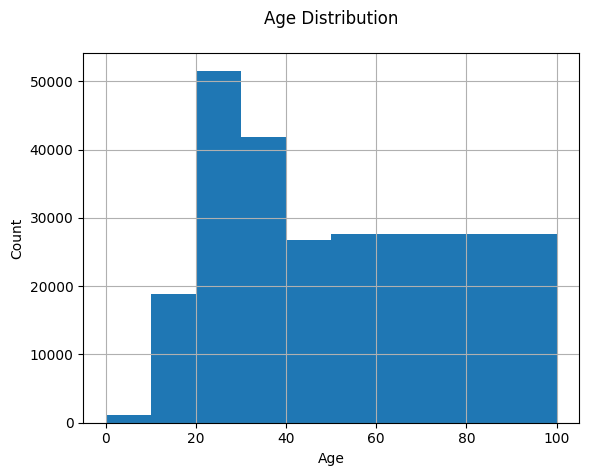

In [130]:
user.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()##plot the hist plot for the age from 0 to 100

Text(0.5, 1.0, 'Find outlier data in Age column')

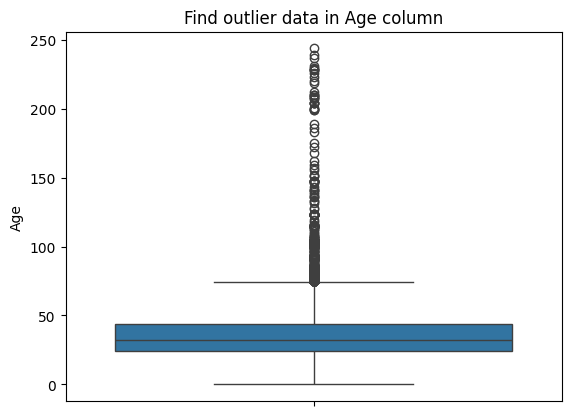

In [131]:
sns.boxplot(y='Age', data=user)
plt.title('Find outlier data in Age column')##checking the outliers in the dataset we could observe that we have th age upto 250

In [132]:
user.Age.nunique()

165

In [133]:
print(sorted(user.Age.unique()))##checking on the unique values in the age column

[np.float64(nan), np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0), np.float64(13.0), np.float64(14.0), np.float64(15.0), np.float64(16.0), np.float64(17.0), np.float64(18.0), np.float64(19.0), np.float64(20.0), np.float64(21.0), np.float64(22.0), np.float64(23.0), np.float64(24.0), np.float64(25.0), np.float64(26.0), np.float64(27.0), np.float64(28.0), np.float64(29.0), np.float64(30.0), np.float64(31.0), np.float64(32.0), np.float64(33.0), np.float64(34.0), np.float64(35.0), np.float64(36.0), np.float64(37.0), np.float64(38.0), np.float64(39.0), np.float64(40.0), np.float64(41.0), np.float64(42.0), np.float64(43.0), np.float64(44.0), np.float64(45.0), np.float64(46.0), np.float64(47.0), np.float64(48.0), np.float64(49.0), np.float64(50.0), np.float64(51.0), np.float64(52.0), np.float64(53.0), np.float64(54.0), np

In [134]:
user.Location.unique().shape

(57339,)

In [135]:
user.drop('Location',axis=1,inplace=True)##we feel that the location is not such important in the model build so will drop it

In [136]:
user.duplicated().sum()##checking for the duplicate values in the user dataset

np.int64(0)

In [137]:
user.isnull().sum()##checkin the sum of is null values in the age column

User-ID         0
Age        110762
dtype: int64

Text(0.5, 1.0, 'Age Distribution Plot')

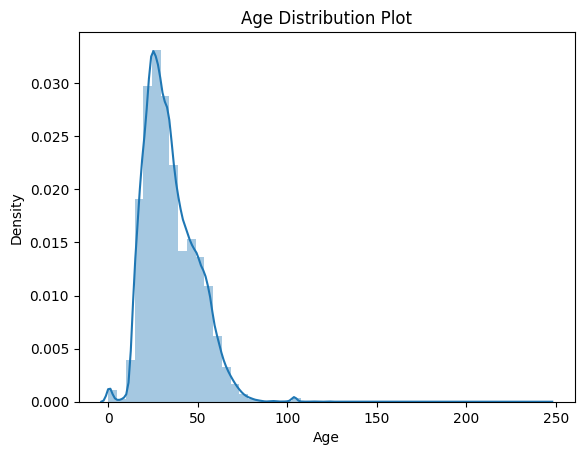

In [138]:
sns.distplot(user.Age)
plt.title('Age Distribution Plot')##plot the distplot to see that dataset distribution for the Age,from this we can observe that most of the age category are from 10 to 80

In [139]:
user = user[(user.Age > 5) & (user.Age < 105)]##since we have many outilers values in the Age columna nd also based on the prevuos plot i hae filter the age from 5 to 105

In [140]:
user.info()##we can see we have removed most of the age values which are with na values

<class 'pandas.core.frame.DataFrame'>
Index: 167080 entries, 1 to 278854
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User-ID  167080 non-null  int64  
 1   Age      167080 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.8 MB


In [141]:
user.isnull().sum()

User-ID    0
Age        0
dtype: int64

In [142]:
user.duplicated().sum()##no duplicates as well in the user dataset

np.int64(0)

In [143]:
user.head()

,User-ID,Age
1,2,18.0
3,4,17.0
5,6,61.0
9,10,26.0
10,11,14.0


##rating dataset

In [144]:
rating = pd.read_csv('Ratings.csv',encoding='latin1')##reading the dataset

In [145]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [146]:
rating.info()##checking for the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [147]:
rating.duplicated().sum()##checkin for the duplicates values

np.int64(0)

In [148]:
rating['Book-Rating'].value_counts()##in the dataset we can see that we have many data with 0 rating if we drop most of the data set will be droped

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

In [149]:
rating['Book-Rating'].unique()##seeing the unique values in the dataset

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

<Axes: xlabel='Book-Rating', ylabel='count'>

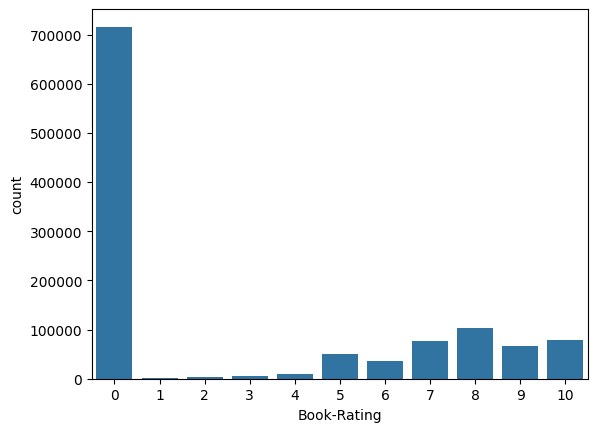

In [150]:
sns.countplot(data=rating,x='Book-Rating')

In [151]:
zero_ratings = rating[rating['Book-Rating'] == 0]
non_zero_ratings = rating[rating['Book-Rating'] != 0]##taking the sample record with shuffle set

In [152]:
zero_sample = zero_ratings.sample(n=50000, random_state=42)# we have taken the Sample 50,000 zero ratings

In [153]:
remaining_sample = non_zero_ratings.sample(n=150000, random_state=42)# Sample remaining records randomly

In [154]:
rating = pd.concat([zero_sample, remaining_sample])# Combine both samples

In [155]:
rating['Book-Rating'].value_counts()##so we have taken the sample of 50000 records randomly

Book-Rating
0     50000
8     35925
10    27191
7     26280
9     23305
5     17648
6     12886
4      3069
3      2126
2       927
1       643
Name: count, dtype: int64

In [156]:
rating['Book-Rating'].value_counts().sum()##we have got the sample records upto to 200000

np.int64(200000)

<Axes: xlabel='Book-Rating', ylabel='count'>

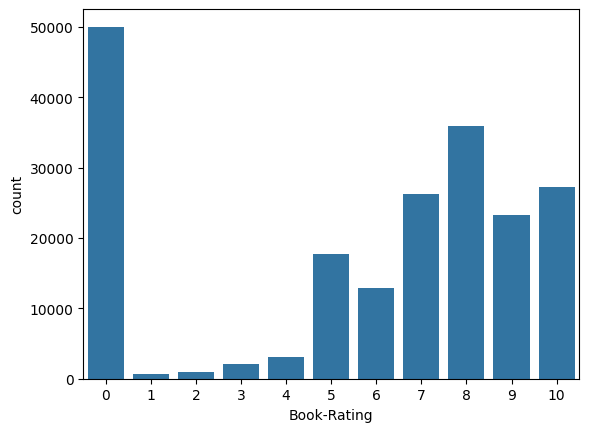

In [157]:
sns.countplot(data=rating,x='Book-Rating')##we can now observ that the dataset is showing the accurate rating

In [158]:
book.shape

(266726, 5)

In [159]:
user.shape

(167080, 2)

In [160]:
rating.shape

(200000, 3)

##Merging

In [161]:
dataset = pd.merge(book, rating, on='ISBN', how='inner')##merge the dataset

In [162]:
dataset = pd.merge(dataset, user, on='User-ID', how='inner')##merge the dataset

In [163]:
dataset.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,263325,6,27.0
1,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,2954,8,71.0
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,152827,7,40.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,35704,6,53.0
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,157969,8,30.0


In [164]:
df=dataset.copy()

In [165]:
df['User-ID']

0         263325
1           2954
2         152827
3          35704
4         157969
           ...  
124467    271836
124468    273718
124469    274220
124470    274220
124471    276579
Name: User-ID, Length: 124472, dtype: int64

In [166]:
df.shape

(124472, 8)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124472 entries, 0 to 124471
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 124472 non-null  object 
 1   Book-Title           124472 non-null  object 
 2   Book-Author          124472 non-null  object 
 3   Year-Of-Publication  124472 non-null  int64  
 4   Publisher            124472 non-null  object 
 5   User-ID              124472 non-null  int64  
 6   Book-Rating          124472 non-null  int64  
 7   Age                  124472 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 7.6+ MB


In [168]:
# saving the merged file
df.to_csv('df.csv', index=False)

#**Model buliding**

## Popularity-Based Recommendation

In [169]:
df.shape

(124472, 8)

In [170]:
def get_popular_books(df, min_ratings=50, top_n=10):
    # Aggregate rating counts and average ratings
    book_popularity = df.groupby("Book-Title").agg(
        rating_count=("Book-Rating", "count"),
        avg_rating=("Book-Rating", "mean")
    ).reset_index()

    # Filter books with minimum number of ratings
    book_popularity = book_popularity[book_popularity["rating_count"] >= min_ratings]

    # Sort by highest average rating first, then by number of ratings
    book_popularity = book_popularity.sort_values(by=["avg_rating", "rating_count"], ascending=[False, False])

    # Drop duplicate book titles and keep only the first occurrence
    book_details = df[["Book-Title", "Book-Author", "Publisher"]].drop_duplicates(subset=["Book-Title"])

    # Merge with book details (ensuring unique titles)
    book_popularity = book_popularity.merge(book_details, on="Book-Title", how="left")

    return book_popularity.head(top_n)


In [171]:
popular_books = get_popular_books(df, min_ratings=50, top_n=10)

In [172]:
popular_books

,Book-Title,rating_count,avg_rating,Book-Author,Publisher
0,Harry Potter and the Sorcerer's Stone (Book 1),57,8.649123,J. K. Rowling,Scholastic
1,The Fellowship of the Ring (The Lord of the Ri...,60,8.450000,J.R.R. TOLKIEN,Del Rey
2,Harry Potter and the Order of the Phoenix (Boo...,68,8.073529,J. K. Rowling,Scholastic
3,Harry Potter and the Goblet of Fire (Book 4),73,8.041096,J. K. Rowling,Scholastic
4,Harry Potter and the Prisoner of Azkaban (Book 3),70,8.014286,J. K. Rowling,Scholastic
5,1984,51,8.000000,George Orwell,Signet Book
6,Harry Potter and the Chamber of Secrets (Book 2),102,7.980392,J. K. Rowling,Scholastic
7,"Tuesdays with Morrie: An Old Man, a Young Man,...",77,7.649351,MITCH ALBOM,Doubleday
8,To Kill a Mockingbird,95,7.473684,Harper Lee,Little Brown &amp; Company
9,Harry Potter and the Sorcerer's Stone (Harry P...,97,7.463918,J. K. Rowling,Arthur A. Levine Books


##collabarative Filtering (User to item)

In [173]:
# from scipy.sparse import csr_matrix

# # Dense matrix (2D NumPy array)
# dense_matrix = np.array([[5, 0, 0],
#                          [0, 3, 0],
#                          [0, 0, 4]])

# # Convert to sparse matrix
# sparse_matrix = csr_matrix(dense_matrix)

# print(sparse_matrix)

In [174]:
##USING KNN With User Id

In [175]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# Step 1: Filter books and users
book_counts = df.groupby("ISBN")["Book-Rating"].count()
user_counts = df.groupby("User-ID")["Book-Rating"].count()

filtered_books = book_counts[book_counts >= 10].index  # Books with at least 10 ratings
filtered_users = user_counts[user_counts >= 5].index  # Users who rated at least 5 books

df = df[df["ISBN"].isin(filtered_books) & df["User-ID"].isin(filtered_users)]

# Step 2: Create a User-Item Matrix
user_item_matrix = df.pivot(index="User-ID", columns="ISBN", values="Book-Rating").fillna(0)

# Convert to sparse matrix
sparse_matrix = csr_matrix(user_item_matrix)

# Step 3: Train a KNN Model (User-Based Collaborative Filtering)
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(sparse_matrix)

# Step 4: Function to Recommend Books Based on Similar Users
def get_user_recommendations(user_id, n=10):
    if user_id not in user_item_matrix.index:
        return "User not found in the matrix!"
   
    # Get the index of the user in the matrix
    user_idx = user_item_matrix.index.get_loc(user_id)
   
    # Find the top N similar users
    distances, indices = knn.kneighbors(sparse_matrix[user_idx], n_neighbors=n+1)
   
    # Get the recommended user IDs (excluding the input user)
    similar_users = user_item_matrix.iloc[indices.flatten()[1:]].index.tolist()
   
    # Get books rated highly by similar users but not yet rated by the input user
    similar_users_books = df[df["User-ID"].isin(similar_users)]
    user_books = set(df[df["User-ID"] == user_id]["ISBN"])
    recommended_books = similar_users_books[~similar_users_books["ISBN"].isin(user_books)]
   
    # Get top recommended books
    recommendations = recommended_books.groupby("ISBN")["Book-Rating"].mean().reset_index()
    recommendations = recommendations.sort_values(by="Book-Rating", ascending=False).head(n)
   
    # Fetch book titles and authors
    final_recommendations = df[df["ISBN"].isin(recommendations["ISBN"])][["Book-Title", "Book-Author"]].drop_duplicates()
   
    return final_recommendations

user_example = 123981  # Replace with an actual User-ID
print(get_user_recommendations(user_example))

                                              Book-Title      Book-Author
1181                                 Angels &amp; Demons        Dan Brown
4833   One for the Money (Stephanie Plum Novels (Pape...  Janet Evanovich
5448                                  Skipping Christmas     JOHN GRISHAM
15062                                  Midwives: A Novel  Chris Bohjalian
16006                                   The Runaway Jury     JOHN GRISHAM
19174       White Oleander : A Novel (Oprah's Book Club)      Janet Fitch
21389                                            Milkrun  Sarah Mlynowski
24696                                       The Stranger     ALBERT CAMUS
36620                                    Scarlet Feather     Maeve Binchy


In [ ]:
# df.info() 254, 388 , 638 , 278221,273718

##content based

In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#Filter books and users
book_counts = df.groupby("ISBN")["Book-Rating"].count()
user_counts = df.groupby("User-ID")["Book-Rating"].count()

filtered_books = book_counts[book_counts >= 10].index  # Books with at least 10 ratings
filtered_users = user_counts[user_counts >= 5].index  # Users who rated at least 5 books

df = df[df["ISBN"].isin(filtered_books) & df["User-ID"].isin(filtered_users)]

#Remove Duplicates and Keep One Unique Row Per Book
df_unique = df.drop_duplicates(subset="Book-Title", keep="first").reset_index(drop=True)

#Create a text feature for similarity comparison
df_unique["book_features"] = (
    df_unique["Book-Title"].fillna("") + " " +
    df_unique["Book-Author"].fillna("") + " " +
    df_unique["Publisher"].fillna("")
)

#Apply TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df_unique["book_features"])

#Compute Cosine Similarity
book_similarity = cosine_similarity(tfidf_matrix)

book_index = pd.Series(df_unique.index, index=df_unique["Book-Title"]).to_dict()


def get_similar_books(book_title, n=15):
    """Returns top N similar books based on the given book title."""

    if book_title not in book_index:
        return "Book not found!"

    idx = book_index[book_title]  # Get row index in df_unique

    if idx >= len(book_similarity):
        return "Book index out of range!"

    # Get top N similar books (excluding the book itself)
    similar_books = book_similarity[idx].argsort()[-n-1:-1][::-1]

    return df.iloc[similar_books][["Book-Title", "Book-Author"]].drop_duplicates()

In [178]:
get_similar_books('The Da Vinci Code')

,Book-Title,Book-Author
160,Wild Animus,Rich Shapero
61,Beloved (Plume Contemporary Fiction),Toni Morrison
1921,Roses Are Red (Alex Cross Novels),James Patterson
662,The Street Lawyer,JOHN GRISHAM
432,Timeline,MICHAEL CRICHTON
880,The Catcher in the Rye,J.D. Salinger
1228,Angels &amp; Demons,Dan Brown
469,To Kill a Mockingbird,Harper Lee
1661,The Big Bad Wolf: A Novel,James Patterson


##Model Evaluation

In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#Filter books and users
book_counts = df.groupby("ISBN")["Book-Rating"].count()
user_counts = df.groupby("User-ID")["Book-Rating"].count()

filtered_books = book_counts[book_counts >= 10].index  # Books with at least 10 ratings
filtered_users = user_counts[user_counts >= 5].index  # Users who rated at least 5 books

df = df[df["ISBN"].isin(filtered_books) & df["User-ID"].isin(filtered_users)]

#Remove Duplicates and Keep One Unique Row Per Book
df_unique = df.drop_duplicates(subset="Book-Title", keep="first").reset_index(drop=True)

#Create a text feature for similarity comparison
df_unique["book_features"] = (
    df_unique["Book-Title"].fillna("") + " " +
    df_unique["Book-Author"].fillna("") + " " +
    df_unique["Publisher"].fillna("")
)

#Apply TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df_unique["book_features"])

#Compute Cosine Similarity
book_similarity = cosine_similarity(tfidf_matrix)

book_index = pd.Series(df_unique.index, index=df_unique["Book-Title"]).to_dict()


def get_similar_books(book_title, n=5):
    """Returns top N similar books based on the given book title."""

    if book_title not in book_index:
        return "Book not found!"

    idx = book_index[book_title]  # Get row index in df_unique

    if idx >= len(book_similarity):
        return "Book index out of range!"

    # Get top N similar books (excluding the book itself)
    similar_books = book_similarity[idx].argsort()[-n-1:-1][::-1]

    return df.iloc[similar_books][["Book-Title", "Book-Author"]].drop_duplicates()

# Function to evaluate recommendations
def evaluate_recommendations(recommendations, ground_truth):
    """
    Evaluates book recommendations using Precision, Recall, and F1-score.
    """
    relevant_set = set(ground_truth)##the ground truth books are the ones rated by users who have also rated the given book.
    recommended_set = set(recommendations)
    true_positives = recommended_set.intersection(relevant_set)

    precision = len(true_positives) / len(recommended_set) if len(recommended_set) > 0 else 0
    recall = len(true_positives) / len(relevant_set) if len(relevant_set) > 0 else 0

    f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0

    return precision, recall, f1

# Function to evaluate model for a given book
def evaluate_model_for_book(book_title, df, top_n=10):##Evaluates the book recommendation model for a given book title.

    recommended_books_df = get_similar_books(book_title, n=top_n)
    recommended_books = recommended_books_df['Book-Title'].tolist()

    # Get ground truth books: Other books rated by users who rated this book
    users_who_rated = df[df['Book-Title'] == book_title]['User-ID'].unique()##all users who have rated the given book
    ground_truth_books_df = df[df['User-ID'].isin(users_who_rated)]
    ground_truth_books = ground_truth_books_df['Book-Title'].unique().tolist()##will pick all the books from the user id we have have got

    precision, recall, f1 = evaluate_recommendations(recommended_books, ground_truth_books)

    print(f"Evaluation for '{book_title}':")
    print(f" Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f" F1-Score: {f1:.2f}")

    return precision, recall, f1


evaluate_model_for_book("The Da Vinci Code", df)

Evaluation for 'The Da Vinci Code':
 Precision: 0.60
Recall: 0.01
 F1-Score: 0.03


(0.6, 0.01485148514851485, 0.02898550724637681)

In [182]:
import pickle

# Save the Popularity-Based model
with open('popularity_model.pkl', 'wb') as file:
    pickle.dump(popular_books, file)

# Save the Collaborative Filtering (KNN) model
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

# Save the Content-Based Filtering components (as a dictionary for easier loading)
content_based_data = {
    'tfidf_model': tfidf,
    'book_similarity_matrix': book_similarity,
    'book_index': book_index
}
with open('content_based_model.pkl', 'wb') as file:
    pickle.dump(content_based_data, file)

# with open('original_user_item_matrix.pkl', 'wb') as f:
#     pickle.dump(user_item_matrix, f)

with open('user_item_matrix.pkl', 'wb') as f:
    pickle.dump(user_item_matrix, f)